In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from catboost import CatBoostRegressor

In [2]:
# loadind the data
train= pd.read_csv("../data/train.csv")
test= pd.read_csv("../data/test.csv")

In [3]:
# shape of training and testing data
train.shape, test.shape

((79853, 12), (34224, 11))

In [4]:
# printing first five rows
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [5]:
test.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural


In [6]:
# columns in the dataset
train.columns, test.columns

(Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
        'Count_3-6_months_late', 'Count_6-12_months_late',
        'Count_more_than_12_months_late', 'application_underwriting_score',
        'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
        'target'],
       dtype='object'),
 Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
        'Count_3-6_months_late', 'Count_6-12_months_late',
        'Count_more_than_12_months_late', 'application_underwriting_score',
        'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type'],
       dtype='object'))

In [7]:
# Data type of the columns
train.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

In [8]:
# Removing the unneccesary columns from train and test sata set
train = train.drop(['sourcing_channel','residence_area_type'],axis=1)
test = test.drop(['residence_area_type','sourcing_channel'], axis=1)

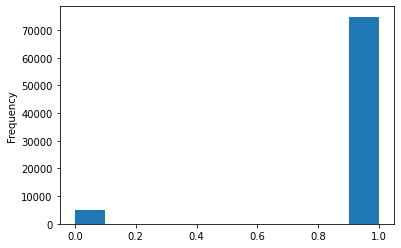

In [9]:
# distribution of target variable
train['target'].plot.hist()

In [10]:
# looking at the correlation between variables
corr= train.corr()

In [11]:
corr

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
id,1.000000,-0.004833,0.005184,-0.001798,-0.005660,-0.002125,0.003424,-0.002124,-0.003328,-0.005064
perc_premium_paid_by_cash_credit,-0.004833,1.000000,-0.259131,-0.031868,0.214470,0.214951,0.168125,-0.142670,-0.152837,-0.240980
age_in_days,0.005184,-0.259131,1.000000,0.029308,-0.058366,-0.072731,-0.059407,0.049888,0.176544,0.095103
Income,-0.001798,-0.031868,0.029308,1.000000,-0.001403,-0.017347,-0.012399,0.085746,0.079078,0.016541
Count_3-6_months_late,-0.005660,0.214470,-0.058366,-0.001403,1.000000,0.204228,0.296085,-0.082781,0.075828,-0.248900
Count_6-12_months_late,-0.002125,0.214951,-0.072731,-0.017347,0.204228,1.000000,0.266306,0.004785,-0.093133,-0.286159
Count_more_than_12_months_late,0.003424,0.168125,-0.059407,-0.012399,0.296085,0.266306,1.000000,-0.031726,-0.021848,-0.240385
application_underwriting_score,-0.002124,-0.142670,0.049888,0.085746,-0.082781,0.004785,-0.031726,1.000000,-0.270864,0.068715
no_of_premiums_paid,-0.003328,-0.152837,0.176544,0.079078,0.075828,-0.093133,-0.021848,-0.270864,1.000000,0.022664
target,-0.005064,-0.240980,0.095103,0.016541,-0.248900,-0.286159,-0.240385,0.068715,0.022664,1.000000


In [12]:
# looking for missing values in the datasaet
train.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
target                                 0
dtype: int64

In [13]:
test.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
dtype: int64

In [14]:
# checking for central statistics
train.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


In [15]:
# treating the missing values
train['Count_3-6_months_late'].fillna(0, inplace=True)
train['Count_6-12_months_late'].fillna(0, inplace=True)
train['Count_more_than_12_months_late'].fillna(0, inplace=True)

In [16]:
test['Count_3-6_months_late'].fillna(0, inplace=True)
test['Count_6-12_months_late'].fillna(0, inplace=True)
test['Count_more_than_12_months_late'].fillna(0, inplace=True)

In [17]:
train['application_underwriting_score'].fillna(train['application_underwriting_score'].mean(), inplace=True)
test['application_underwriting_score'].fillna(test['application_underwriting_score'].mean(), inplace=True)

In [18]:
# looking for missing values in the datasaet
test.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
dtype: int64

In [19]:
train.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
target                              0
dtype: int64

In [20]:
# breaking the training set into two to check the model
training= train[:60000]
validation= train[60000:]

In [21]:
x_train= training.drop('target', axis=1)
y_train= training['target']
x_val= validation.drop('target', axis=1)
y_val= validation['target']

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
# initialize the logistic regression model
logreg= LogisticRegression()

In [24]:
# fitting the model on x_train and y_train
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
# checking the shape of x_train, y_train, x_val and y_val
x_train.shape,y_train.shape,x_val.shape,y_val.shape

((60000, 9), (60000,), (19853, 9), (19853,))

In [26]:
# making prediction on validation set
pred= logreg.predict(x_val)

In [27]:
# defining a function which will return the rmse score
def rmse(y, y_):
    y = np.exp(y),   
    y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [28]:
# calculating rmse of the predicted values
rmse(y_val,pred)

0.15271161270238282

In [29]:
logreg.score(x_val,y_val)

0.939354253765174

In [30]:
 from catboost import CatBoostRegressor

In [31]:
# initialize the catboost regressor model
cbr= CatBoostRegressor(iterations=300, depth=4, learning_rate=0.069, loss_function='RMSE' )

In [32]:
# fitting the model on x_train and y_train
cbr.fit(x_train, y_train)

0:	learn: 0.2408952	total: 58.7ms	remaining: 17.6s
1:	learn: 0.2387221	total: 62.6ms	remaining: 9.33s
2:	learn: 0.2367960	total: 66.1ms	remaining: 6.55s
3:	learn: 0.2352266	total: 69.8ms	remaining: 5.17s
4:	learn: 0.2337186	total: 73.5ms	remaining: 4.33s
5:	learn: 0.2323925	total: 77.2ms	remaining: 3.78s
6:	learn: 0.2313320	total: 81ms	remaining: 3.39s
7:	learn: 0.2302932	total: 84.8ms	remaining: 3.1s
8:	learn: 0.2294175	total: 88.6ms	remaining: 2.87s
9:	learn: 0.2285657	total: 92.2ms	remaining: 2.67s
10:	learn: 0.2278665	total: 95.9ms	remaining: 2.52s
11:	learn: 0.2272177	total: 99.7ms	remaining: 2.39s
12:	learn: 0.2266202	total: 103ms	remaining: 2.28s
13:	learn: 0.2260735	total: 107ms	remaining: 2.18s
14:	learn: 0.2256072	total: 111ms	remaining: 2.1s
15:	learn: 0.2251657	total: 114ms	remaining: 2.03s
16:	learn: 0.2247667	total: 118ms	remaining: 1.96s
17:	learn: 0.2244324	total: 121ms	remaining: 1.9s
18:	learn: 0.2241273	total: 125ms	remaining: 1.85s
19:	learn: 0.2238153	total: 129ms	

169:	learn: 0.2183086	total: 620ms	remaining: 474ms
170:	learn: 0.2182897	total: 626ms	remaining: 472ms
171:	learn: 0.2182802	total: 634ms	remaining: 472ms
172:	learn: 0.2182666	total: 640ms	remaining: 470ms
173:	learn: 0.2182659	total: 645ms	remaining: 467ms
174:	learn: 0.2182433	total: 648ms	remaining: 463ms
175:	learn: 0.2182298	total: 651ms	remaining: 459ms
176:	learn: 0.2182128	total: 655ms	remaining: 455ms
177:	learn: 0.2181966	total: 659ms	remaining: 451ms
178:	learn: 0.2181763	total: 661ms	remaining: 447ms
179:	learn: 0.2181551	total: 664ms	remaining: 443ms
180:	learn: 0.2181478	total: 667ms	remaining: 439ms
181:	learn: 0.2181250	total: 670ms	remaining: 434ms
182:	learn: 0.2181118	total: 673ms	remaining: 430ms
183:	learn: 0.2180970	total: 675ms	remaining: 426ms
184:	learn: 0.2180785	total: 678ms	remaining: 422ms
185:	learn: 0.2180759	total: 681ms	remaining: 417ms
186:	learn: 0.2180649	total: 684ms	remaining: 413ms
187:	learn: 0.2180548	total: 687ms	remaining: 409ms
188:	learn: 

In [33]:
# making prediction on validation set
prediction= cbr.predict(x_val)

In [34]:
# calculating rmse of the predicted values
rmse(y_val,prediction)

0.1361584371068718

In [35]:
# applying the better model on testing data 
final_prediction= cbr.predict(test)

In [36]:
# checking the shape of final prediction
final_prediction.shape

(34224,)

In [37]:
submission= pd.DataFrame()

In [38]:
# creating a id column
submission['id'] = test['id']

In [39]:
# creating a target column and saving the predictions in it
submission['target'] = final_prediction

In [43]:
submission.to_csv('submissions.csv', header=True, index=False)

In [44]:
sub= pd.read_csv('submissions.csv')

In [45]:
sub.head()

,id,target
0,649,0.993492
1,81136,0.989060
2,70762,0.817351
3,53935,0.980965
4,15476,0.949232
